# WOMEN'S HACK FOR SAFETY

## INTRODUCTION

South Africa has one of the highest crime rates in Africa, with approximately 2 million crimes reported every year. Women experience crime and are vulnerable to crime in different ways from men.

Let's build a machine learning model that predicts a woman’s level of risk of being victimized by a crime given 
basic information about her and her life.

<img src="GBV.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND EXPLORATORY ANALYSIS

### Importing Libraries and Datasets

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

# Libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

print("Done importing libraries...")

Done importing libraries...


In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [4]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [5]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [7]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target,train
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0,1
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0,1
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0,1
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1


In [8]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,train
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,...,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent,0
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,...,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,...,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,...,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,...,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0


In [9]:
print('Train_df size: {}\n Test_df size: {}'.format(train_df.shape,test_df.shape))

Train_df size: (7736, 22)
 Test_df size: (3316, 21)


In [12]:
# Missing data

all_data.isnull().sum()

ID                      0
gender                  0
age                     0
race                    0
dwelling                0
dwelling_type           0
province_code           0
metro_code              0
psu                     0
nationality             0
RTH                     0
marital_st              0
Lang_inside             0
Lang_outside            0
Education               0
lw_work                 0
lw_business             0
help_on_household       0
job_or_business         0
nature_of_work          0
target               3316
train                   0
dtype: int64

In [13]:
train_df.describe()

,age,psu,target,train
count,7736.000000,7.736000e+03,7736.000000,7736.0
mean,42.193252,6.078730e+07,0.078206,1.0
std,17.269251,2.548540e+07,0.268513,0.0
min,16.000000,1.601007e+07,0.000000,1.0
25%,29.000000,3.681004e+07,0.000000,1.0
50%,39.000000,5.991442e+07,0.000000,1.0
75%,54.000000,7.991039e+07,0.000000,1.0
max,102.000000,9.871054e+07,1.000000,1.0


In [14]:
test_df.describe()

,age,psu,train
count,3316.000000,3.316000e+03,3316.0
mean,41.414053,6.168885e+07,0.0
std,17.028948,2.551864e+07,0.0
min,16.000000,1.601007e+07,0.0
25%,28.000000,3.741003e+07,0.0
50%,38.000000,6.621058e+07,0.0
75%,53.000000,7.991159e+07,0.0
max,98.000000,9.871053e+07,0.0


In [15]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

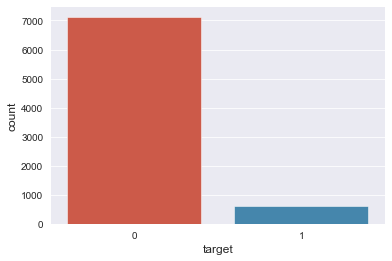

In [16]:
sns.countplot(train_df["target"])

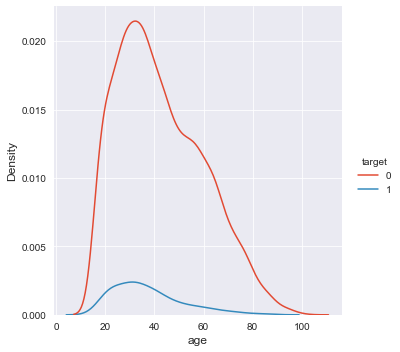

In [17]:
sns.displot( train_df , x = 'age', hue='target' , kind = 'kde')
plt.show()

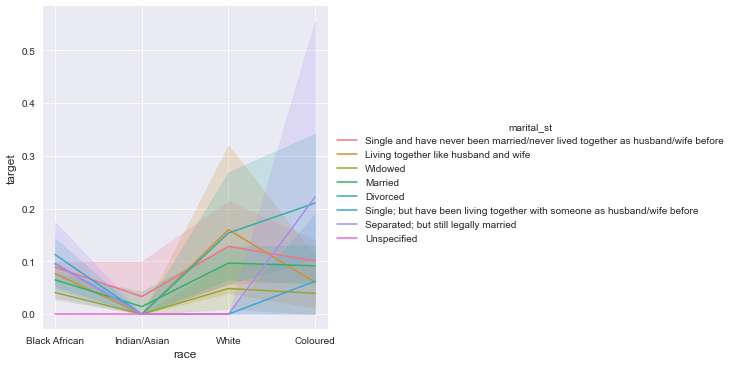

In [26]:
sns.relplot(x='race', y='target', hue='marital_st',kind='line', data=train_df)
plt.show()

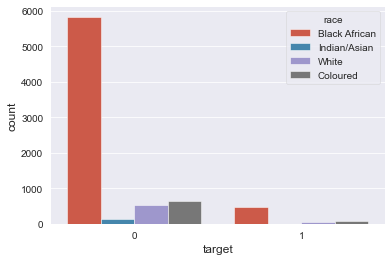

In [28]:
sns.countplot(x="target", hue='race', data=train_df)
plt.show()

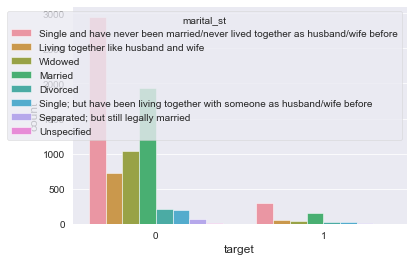

In [29]:
sns.countplot(x="target", hue='marital_st', data=train_df)
plt.show()

### Data Preprocessing

In [31]:
# making age bins

age_bin_labels = [1, 2, 3,4,5,6]

all_data['Binned_Age'] =  pd.qcut(all_data['age'], q=6, labels=age_bin_labels).astype(int)

In [32]:
all_data = all_data.drop(['ID','gender','psu','age','metro_code'], axis =1)

In [64]:
train['age'].nunique()

85

In [34]:
all_data.columns

Index(['race', 'dwelling', 'dwelling_type', 'province_code', 'nationality',
       'RTH', 'marital_st', 'Lang_inside', 'Lang_outside', 'Education',
       'lw_work', 'lw_business', 'help_on_household', 'job_or_business',
       'nature_of_work', 'target', 'train', 'Binned_Age'],
      dtype='object')

In [36]:
col = ['race', 'dwelling', 'dwelling_type', 'province_code', 'nationality',
       'RTH', 'marital_st', 'Lang_inside', 'Lang_outside', 'Education',
       'lw_work', 'lw_business', 'help_on_household', 'job_or_business',
       'nature_of_work', 'Binned_Age']

all_data = pd.get_dummies(all_data, columns= col)

In [37]:
all_data.head()

,target,train,race_Black African,race_Coloured,race_Indian/Asian,race_White,dwelling_Caravan/tent,dwelling_Cluster house in complex,dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm,dwelling_Dwelling/house/flat/room in backyard,...,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified,Binned_Age_1,Binned_Age_2,Binned_Age_3,Binned_Age_4,Binned_Age_5,Binned_Age_6
0,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [39]:
features = train_df.drop(['target','train'], axis=1)
label = train_df.target

In [40]:
print('Number of class 1 samples before:',features[label == 1].shape[0])

Number of class 1 samples before: 605


In [42]:
from sklearn.utils import resample

features_upsampled, label_upsampled = resample(features[label == 1],label[label == 1],n_samples=features[label == 0].shape[0],random_state=50)
print('Number of class 1 samples after:',features_upsampled.shape[0])

Number of class 1 samples after: 7131


In [43]:
X_bal = np.vstack((features[label == 0], features_upsampled))
y_bal = np.hstack((label[label == 0], label_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [50]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.33, random_state=42)

## MODEL BUILDING AND EVALUATION

### Model Building

In [48]:
import re
features = features.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [71]:
cat_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

In [72]:
cat = CatBoostClassifier(**cat_params)
lgm = LGBMClassifier(n_estimators=1500)

classifier = [lgm,cat]
classifier_names = ['LR','CAT']

In [73]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val,pred)
        print(f'{classifier_names[i]}:{roc}')

In [74]:
pred(classifier)

LR:0.56197863354638
0:	learn: 0.6424219	total: 194ms	remaining: 1m 36s
1:	learn: 0.5971467	total: 214ms	remaining: 53.2s
2:	learn: 0.5581477	total: 233ms	remaining: 38.6s
3:	learn: 0.5234537	total: 254ms	remaining: 31.5s
4:	learn: 0.4930655	total: 274ms	remaining: 27.2s
5:	learn: 0.4660377	total: 284ms	remaining: 23.4s
6:	learn: 0.4419422	total: 295ms	remaining: 20.8s
7:	learn: 0.4215752	total: 305ms	remaining: 18.8s
8:	learn: 0.4036502	total: 316ms	remaining: 17.2s
9:	learn: 0.3876715	total: 326ms	remaining: 16s
10:	learn: 0.3737751	total: 334ms	remaining: 14.9s
11:	learn: 0.3615463	total: 340ms	remaining: 13.8s
12:	learn: 0.3507168	total: 346ms	remaining: 13s
13:	learn: 0.3408301	total: 353ms	remaining: 12.2s
14:	learn: 0.3324382	total: 359ms	remaining: 11.6s
15:	learn: 0.3249321	total: 364ms	remaining: 11s
16:	learn: 0.3180275	total: 369ms	remaining: 10.5s
17:	learn: 0.3121137	total: 392ms	remaining: 10.5s
18:	learn: 0.3068800	total: 398ms	remaining: 10.1s
19:	learn: 0.3020669	total

179:	learn: 0.2456733	total: 1.28s	remaining: 2.27s
180:	learn: 0.2456099	total: 1.28s	remaining: 2.26s
181:	learn: 0.2454138	total: 1.29s	remaining: 2.26s
182:	learn: 0.2453789	total: 1.3s	remaining: 2.25s
183:	learn: 0.2453057	total: 1.3s	remaining: 2.24s
184:	learn: 0.2452502	total: 1.31s	remaining: 2.23s
185:	learn: 0.2451460	total: 1.31s	remaining: 2.21s
186:	learn: 0.2450794	total: 1.32s	remaining: 2.21s
187:	learn: 0.2449506	total: 1.32s	remaining: 2.19s
188:	learn: 0.2449057	total: 1.33s	remaining: 2.19s
189:	learn: 0.2448640	total: 1.33s	remaining: 2.17s
190:	learn: 0.2447453	total: 1.35s	remaining: 2.19s
191:	learn: 0.2446001	total: 1.35s	remaining: 2.17s
192:	learn: 0.2444770	total: 1.36s	remaining: 2.17s
193:	learn: 0.2444442	total: 1.37s	remaining: 2.15s
194:	learn: 0.2444169	total: 1.37s	remaining: 2.14s
195:	learn: 0.2443134	total: 1.38s	remaining: 2.13s
196:	learn: 0.2443014	total: 1.38s	remaining: 2.12s
197:	learn: 0.2442456	total: 1.39s	remaining: 2.11s
198:	learn: 0.

345:	learn: 0.2370833	total: 2.15s	remaining: 958ms
346:	learn: 0.2370727	total: 2.16s	remaining: 952ms
347:	learn: 0.2370531	total: 2.16s	remaining: 945ms
348:	learn: 0.2370060	total: 2.17s	remaining: 939ms
349:	learn: 0.2369845	total: 2.17s	remaining: 932ms
350:	learn: 0.2369761	total: 2.18s	remaining: 927ms
351:	learn: 0.2369393	total: 2.19s	remaining: 920ms
352:	learn: 0.2369073	total: 2.19s	remaining: 913ms
353:	learn: 0.2368259	total: 2.2s	remaining: 907ms
354:	learn: 0.2367819	total: 2.2s	remaining: 900ms
355:	learn: 0.2367228	total: 2.21s	remaining: 893ms
356:	learn: 0.2366437	total: 2.21s	remaining: 887ms
357:	learn: 0.2366033	total: 2.22s	remaining: 880ms
358:	learn: 0.2365900	total: 2.22s	remaining: 874ms
359:	learn: 0.2365823	total: 2.23s	remaining: 867ms
360:	learn: 0.2365722	total: 2.23s	remaining: 861ms
361:	learn: 0.2365382	total: 2.24s	remaining: 854ms
362:	learn: 0.2364915	total: 2.25s	remaining: 848ms
363:	learn: 0.2364511	total: 2.25s	remaining: 841ms
364:	learn: 0.

## PREDICTION AND SUBMISSION

### Prediction

Two (2) models using LightGBMClassifier,CatBoostClassifier were built and evaluated.

CatBoostRegression was the best model with a higher roc_auc_score of 60.16%.

In [54]:
test_df.head()

,target,train,race_BlackAfrican,race_Coloured,race_IndianAsian,race_White,dwelling_Caravantent,dwelling_Clusterhouseincomplex,dwelling_Dwellinghouseorbrickconcreteblockstructureonaseparatestandoryardorfarm,dwelling_Dwellinghouseflatroominbackyard,...,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified,Binned_Age_1,Binned_Age_2,Binned_Age_3,Binned_Age_4,Binned_Age_5,Binned_Age_6
0,NaN,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
test_features = test_df.drop(['target','train'], axis =1)

In [56]:
test_features.shape

(3316, 143)

In [57]:
features.shape

(7736, 143)

In [75]:
#lgm = LGBMClassifier(n_estimators=1500)
#lgm.fit(X, y)
#test_predi = lgm.predict_proba(test_features)[:,1]

cat = CatBoostClassifier(**cat_params)
cat.fit(features, label)
test_predi = cat.predict_proba(test_features)[:,1]

#vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
#vcf.fit(X,y)
#test_predi = vcf.predict_proba(test_features)[:,1]

0:	learn: 0.6430038	total: 23ms	remaining: 11.5s
1:	learn: 0.5990353	total: 46.5ms	remaining: 11.6s
2:	learn: 0.5596288	total: 64.4ms	remaining: 10.7s
3:	learn: 0.5251901	total: 77.3ms	remaining: 9.58s
4:	learn: 0.4954527	total: 89.1ms	remaining: 8.82s
5:	learn: 0.4689206	total: 98.2ms	remaining: 8.08s
6:	learn: 0.4458007	total: 107ms	remaining: 7.53s
7:	learn: 0.4255170	total: 116ms	remaining: 7.11s
8:	learn: 0.4076081	total: 124ms	remaining: 6.79s
9:	learn: 0.3913761	total: 133ms	remaining: 6.54s
10:	learn: 0.3775023	total: 142ms	remaining: 6.32s
11:	learn: 0.3652737	total: 151ms	remaining: 6.13s
12:	learn: 0.3545071	total: 159ms	remaining: 5.96s
13:	learn: 0.3450872	total: 168ms	remaining: 5.82s
14:	learn: 0.3364369	total: 176ms	remaining: 5.68s
15:	learn: 0.3290496	total: 182ms	remaining: 5.51s
16:	learn: 0.3226214	total: 189ms	remaining: 5.36s
17:	learn: 0.3168252	total: 195ms	remaining: 5.22s
18:	learn: 0.3117827	total: 201ms	remaining: 5.1s
19:	learn: 0.3069958	total: 208ms	rema

172:	learn: 0.2559813	total: 1.28s	remaining: 2.42s
173:	learn: 0.2559123	total: 1.29s	remaining: 2.41s
174:	learn: 0.2558801	total: 1.29s	remaining: 2.4s
175:	learn: 0.2558507	total: 1.3s	remaining: 2.39s
176:	learn: 0.2558269	total: 1.31s	remaining: 2.38s
177:	learn: 0.2557972	total: 1.31s	remaining: 2.38s
178:	learn: 0.2557588	total: 1.32s	remaining: 2.37s
179:	learn: 0.2556427	total: 1.33s	remaining: 2.36s
180:	learn: 0.2555533	total: 1.34s	remaining: 2.35s
181:	learn: 0.2553743	total: 1.34s	remaining: 2.35s
182:	learn: 0.2553334	total: 1.35s	remaining: 2.34s
183:	learn: 0.2552800	total: 1.36s	remaining: 2.33s
184:	learn: 0.2551945	total: 1.36s	remaining: 2.33s
185:	learn: 0.2551584	total: 1.37s	remaining: 2.32s
186:	learn: 0.2551427	total: 1.38s	remaining: 2.31s
187:	learn: 0.2551192	total: 1.39s	remaining: 2.3s
188:	learn: 0.2550984	total: 1.39s	remaining: 2.29s
189:	learn: 0.2550715	total: 1.4s	remaining: 2.28s
190:	learn: 0.2550370	total: 1.41s	remaining: 2.27s
191:	learn: 0.25

356:	learn: 0.2444343	total: 2.53s	remaining: 1.01s
357:	learn: 0.2444261	total: 2.54s	remaining: 1.01s
358:	learn: 0.2443966	total: 2.54s	remaining: 1000ms
359:	learn: 0.2443546	total: 2.55s	remaining: 993ms
360:	learn: 0.2443209	total: 2.56s	remaining: 985ms
361:	learn: 0.2442418	total: 2.56s	remaining: 978ms
362:	learn: 0.2442036	total: 2.57s	remaining: 971ms
363:	learn: 0.2441856	total: 2.58s	remaining: 963ms
364:	learn: 0.2441596	total: 2.58s	remaining: 956ms
365:	learn: 0.2441419	total: 2.59s	remaining: 949ms
366:	learn: 0.2440684	total: 2.6s	remaining: 942ms
367:	learn: 0.2439949	total: 2.6s	remaining: 935ms
368:	learn: 0.2439778	total: 2.61s	remaining: 927ms
369:	learn: 0.2439084	total: 2.62s	remaining: 920ms
370:	learn: 0.2438027	total: 2.63s	remaining: 913ms
371:	learn: 0.2437505	total: 2.63s	remaining: 906ms
372:	learn: 0.2436956	total: 2.64s	remaining: 899ms
373:	learn: 0.2436792	total: 2.65s	remaining: 891ms
374:	learn: 0.2436054	total: 2.65s	remaining: 884ms
375:	learn: 0

In [78]:
import shap

In [79]:
explainer = shap.Explainer(cat)
shap_values = explainer(features)

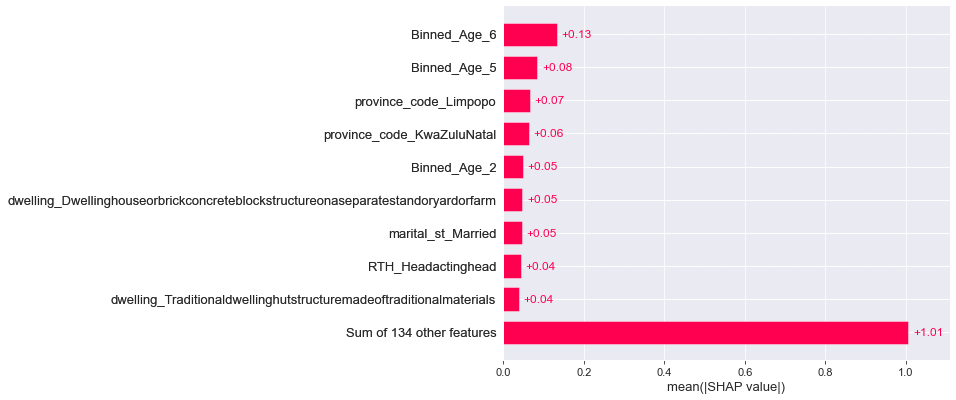

In [80]:
shap.plots.bar(shap_values)

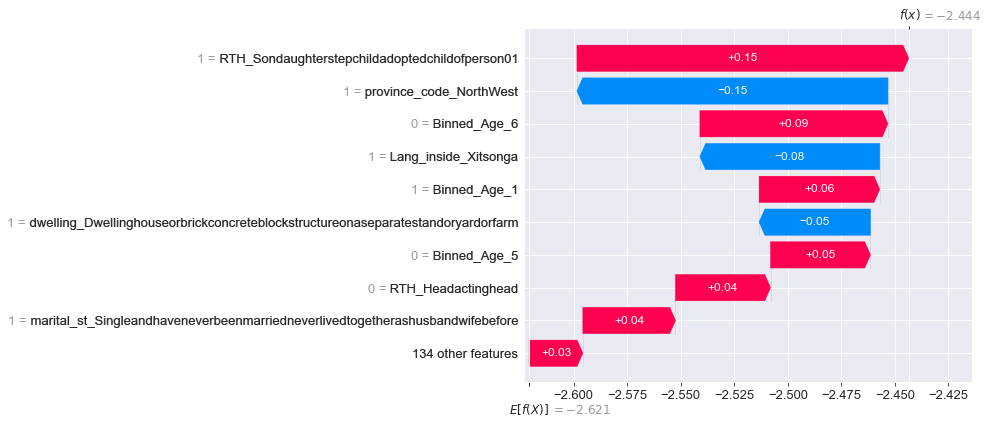

In [81]:
shap.plots.waterfall(shap_values[0])

### Submission

In [76]:
final_sub = pd.DataFrame({'ID':test.ID,
                          'target': test_predi})
final_sub.to_csv('safety_sub2.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [77]:
final_sub.head()

,ID,target
0,ID_00241643,0.104721
1,ID_00312043,0.027564
2,ID_00345323,0.128060
3,ID_00369643,0.086543
4,ID_00381163,0.079344
